In [3]:
import os
import pandas as pd
import numpy as np
os.chdir('/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis')
from Utils import validationGAN
from Utils import plotUtils
from ipfn import ipfn
import matplotlib.pyplot as plt

In [2]:
df_dtypes = {
    'CarModelYear': 'category',
    'Education': 'category',
    'FamNumAdults': 'float64',
    'FamNumPers': 'float64',
    'FuelType': 'category',
    'Gender': 'category',
    'Handicap': 'category',
    'HomeAdrZone': 'category',
    'HousehCarOwnership': 'category',
    'HousehNumAdults': 'float64',
    'HousehNumPers': 'float64',
    'HousehNumcars': 'float64',
    'HwDayspW': 'category',
    'IncFamily2000': 'float64',
    'IncRespondent2000': 'float64',
    'KidsBetween0and4': 'float64',
    'KidsBetween4and15': 'float64',
    'MunicipalityDest': 'category',
    'MunicipalityOrigin': 'category',
    'PopSocio': 'category',
    'PrimOccZone': 'category',
    'RespAgeCorrect': 'int4',
    'RespHasBicycle': 'category',
    'RespHasRejsekort': 'category',
    'RespIsmemCarshare': 'category',
    'RespPrimOcc': 'category',
    'ResphasDrivlic': 'category',
    'Sector': 'category',
    'WorkHourType': 'category',
    'WorkHoursPw': 'float64',
    'Year': 'category',
    'HomeParkPoss': 'category',
    'HousehAccomodation': 'category',
    'HousehAccOwnorRent': 'category',
    'PosInFamily': 'category',
    'PrimModeDay': 'category',
    'ModeChainTypeDay': 'category',
    'RespHasSeasonticket': 'category'
}

os.chdir('/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Data')
p1 = pd.read_csv('WGAN_samples_fewCol_incageNum_p1.csv')
p2 = pd.read_csv('WGAN_samples_fewCol_incageNum_p2.csv')
samples = pd.concat([p1,p2])

In [3]:
samples.HomeAdrZone.nunique()

1864

In [4]:
#MunicipalityOrigin
#Gender
#PopSocio
#AgeGroup

In [5]:
samples['RespAgeCorrect'] = samples['RespAgeCorrect'].astype('int64')
samples = samples.loc[samples.RespAgeCorrect < 126]

In [5]:
os.chdir('/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Data')
marginal = pd.read_csv('codesMarg.csv', header=None)
pop_rename = {
    0:'Gender',
    1:'AgeGroup',
    2:'PopSocio',
    4:'Education',
    5:'Sector',
    6:'Val',

}

marginal.rename(index=str, columns=pop_rename, inplace=True)
marginal.Gender = marginal.Gender.astype('category').cat.rename_categories({'M':1, 'K':2})
marginal.Val.sum()

1876969

In [7]:
marginal.Val = marginal.Val/marginal.Val.sum()

In [8]:
marginal.groupby(['Gender']).Val.sum().reset_index()

,Gender,Val
0,2,0.501065
1,1,0.498935


In [9]:
marginal.groupby(['AgeGroup']).Val.sum().reset_index()

,AgeGroup,Val
0,15-19,0.080724
1,20-24,0.090894
2,25-29,0.104944
3,30-34,0.097306
4,35-39,0.085041
5,40-44,0.090716
6,45-49,0.099964
7,50-54,0.100111
8,55-59,0.095964
9,60-64,0.081195


In [10]:
marginal.groupby(['PopSocio']).Val.sum().reset_index()

,PopSocio,Val
0,0,0.156865
1,1,0.615444
2,2,0.029741
3,3,0.197951


In [11]:
inc = pd.read_csv('/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Data/INDKP105_code.csv', sep=';')


In [12]:
inc.ALDER1.unique()

array(['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-64', '65-69', '70-74', '74-00'], dtype=object)

In [41]:
age = pd.read_csv('age.csv',header=None, sep=';')
gender = pd.read_csv('Gender.csv', header=None, sep=';')
mun = pd.read_csv('mun2020.csv', header=None, sep=';')

In [42]:
age.rename(index=str, columns={0:'RespAgeCorrect', 1:'total'}, inplace=True)
age['total'] = age['total']/age['total'].sum()

In [43]:
gender.rename(index=str, columns={0:'Gender', 1:'total'}, inplace=True)
gender['total'] = gender['total']/gender['total'].sum()

In [44]:
mun.rename(index=str, columns={0:'MunicipalityOrigin', 1:'total'}, inplace=True)
mun['total'] = mun['total']/mun['total'].sum()

In [45]:
marginal = marginal.rename(columns={'Val':'total'})
marginal['total'] = marginal['total']/marginal['total'].sum()
popSocio=marginal.groupby(['PopSocio'])['total'].sum()

In [46]:
mun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MunicipalityOrigin  99 non-null     int64  
 1   total               99 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 2.3+ KB


In [47]:
age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RespAgeCorrect  126 non-null    int64  
 1   total           126 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.0+ KB


In [48]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2 non-null      int64  
 1   total   2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 48.0+ bytes


In [14]:
samples.info()

NameError: name 'samples' is not defined

In [22]:
age.RespAgeCorrect

0        0
1        1
2        2
3        3
4        4
      ... 
121    121
122    122
123    123
124    124
125    125
Name: RespAgeCorrect, Length: 126, dtype: int64

In [49]:
mun.MunicipalityOrigin = mun.MunicipalityOrigin.astype('category')
age.RespAgeCorrect = age.RespAgeCorrect.astype('category')
gender.Gender = gender.Gender.astype('category')

In [24]:
samples.MunicipalityOrigin = samples.MunicipalityOrigin.astype('category')
samples.RespAgeCorrect = samples.RespAgeCorrect.astype('category')
samples.Gender = samples.Gender.astype('category')

In [50]:
mun = mun[['MunicipalityOrigin','total']]
age = age[['RespAgeCorrect','total']]
gender = gender[['Gender','total']]

In [51]:
mun = mun.set_index('MunicipalityOrigin')
age = age.set_index('RespAgeCorrect')
gender = gender.set_index('Gender')

In [52]:
mun = mun.squeeze()
age = age.squeeze()
gender = gender.squeeze()

In [19]:
mun.to_csv('municipalityOriginp.csv')

In [20]:
age.to_csv('RespAgeCorrectp.csv')

In [21]:
gender.to_csv('Genderp.csv')

In [22]:
popSocio.to_csv('popsociop.csv')

In [28]:
mun

MunicipalityOrigin
101    0.108598
147    0.017913
155    0.002489
185    0.007383
165    0.004763
         ...   
773    0.003477
840    0.005172
787    0.007457
820    0.006307
851    0.037280
Name: total, Length: 99, dtype: float64

In [33]:
def sample(IPF, df):
    final = pd.DataFrame()
    sampled_groups = []
    
    for _, row in IPF.iterrows():
        conditions = [df[attr] == row[attr] for attr in IPF.columns[:-1]]
        mask = pd.concat(conditions, axis=1).all(axis=1)
    
        if mask.any():
            group = df[mask]
            new = group.sample(n=round(row['total']), replace=True, ignore_index=True)
            sampled_groups.append(new)
        elif len(IPF.columns)>2:
            conditions = [df[attr] == row[attr] for attr in IPF.columns[:-2]]
            mask = pd.concat(conditions, axis=1).all(axis=1)
            
            if mask.any():
                group = df[mask]
                new = group.sample(n=round(row['total']), replace=True, ignore_index=True)
                sampled_groups.append(new)
            elif len(IPF.columns)>3:
                conditions = [df[attr] == row[attr] for attr in IPF.columns[:-3]]
                mask = pd.concat(conditions, axis=1).all(axis=1)
                if mask.any():
                    group = df[mask]
                    new = group.sample(n=round(row['total']), replace=True, ignore_index=True)
                    sampled_groups.append(new)

    
    return pd.concat(sampled_groups, ignore_index=True)

In [34]:
def genPopIPF(df, attr, dist):
    group = list(set([item for sublist in attr for item in sublist]))
    Init = pd.DataFrame(df.groupby(group, as_index=False).size())
    
    Init = Init.rename(columns={'size':'total'})
    Init['total']= Init['total'].replace(0,0.01)
    IPF = ipfn.ipfn(Init, dist, attr)
    sol = IPF.iteration()
    
    final = sample(sol, df)
    
    return final

In [31]:
popSocio

PopSocio
0    0.156865
1    0.615444
2    0.029741
3    0.197951
Name: total, dtype: float64

In [32]:
n= 5822763

In [33]:
popSocio

PopSocio
0    0.156865
1    0.615444
2    0.029741
3    0.197951
Name: total, dtype: float64

In [34]:
#mun = mun[['MunicipalityOrigin','total']]
#age = age[['RespAgeCorrect','total']]
#gender = gender[['Gender','total']]
#popSocio = popSocio[['PopSocio','total']]

In [35]:
mun

MunicipalityOrigin
101    0.108598
147    0.017913
155    0.002489
185    0.007383
165    0.004763
         ...   
773    0.003477
840    0.005172
787    0.007457
820    0.006307
851    0.037280
Name: total, Length: 99, dtype: float64

In [36]:
samples.Gender = samples.Gender.astype('category')

In [37]:
samples.RespAgeCorrect = abs(samples.RespAgeCorrect)

TypeError: Object with dtype category cannot perform the numpy op absolute

In [ ]:
min(samples.RespAgeCorrect)

0.0

In [31]:
popSocio

PopSocio
0    0.156865
1    0.615444
2    0.029741
3    0.197951
Name: total, dtype: float64

In [38]:
#IPF
n= 5822763

ag1 = mun*n
ag2 = gender*n
ag3 = age*n
ag4 = popSocio*n

dimensions = [['MunicipalityOrigin'],['Gender'], ['RespAgeCorrect'], ['PopSocio']]
#dimensions = [['Gender']]
aggregates = [ag1, ag2,ag3,ag4]
df = genPopIPF(samples, dimensions, aggregates)

ipfn converged: convergence_rate not updating or below rate_tolerance


In [39]:
df.to_csv('wgan_population.csv',index=False)

In [40]:
df

,CarModelYear,Education,FamNumAdults,FamNumPers,FuelType,Gender,Handicap,HomeAdrZone,HousehCarOwnership,HousehNumAdults,...,RespIsmemCarshare,RespPrimOcc,ResphasDrivlic,Sector,WorkHourType,WorkHoursPw,Year,IncFamily2000,IncRespondent2000,RespAgeCorrect
0,2014.0,H10,2,6,2.0,1,2.0,710033.0,1.0,2,...,1.0,107.0,-18.0,Education,Not working,0.0,2016,487.0,5.0,0
1,2014.0,H10,2,6,2.0,1,2.0,710033.0,1.0,2,...,1.0,107.0,-18.0,Education,Not working,0.0,2016,487.0,5.0,0
2,2009.0,H10,2,4,2.0,1,2.0,746041.0,2.0,2,...,1.0,107.0,-18.0,Education,Not working,0.0,2017,72.0,5.0,0
3,2014.0,H10,2,4,2.0,1,2.0,1349.0,1.0,2,...,1.0,107.0,-18.0,Education,Not working,0.0,2018,41.0,5.0,0
4,2006.0,H20,2,4,1.0,1,2.0,320034.0,1.0,2,...,1.0,107.0,-18.0,Activity not stated,Not working,0.0,2017,5.0,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809960,1996.0,H10,1,1,1.0,2,2.0,791243.0,1.0,2,...,2.0,370.0,1.0,Activity not stated,2.0,0.0,2018,201.0,331.0,105
5809961,2012.0,H30,1,1,1.0,2,2.0,1527.0,1.0,2,...,2.0,350.0,1.0,Activity not stated,Not working,0.0,2010,66.0,192.0,105
5809962,1989.0,H10,1,1,1.0,2,2.0,860213.0,1.0,1,...,2.0,360.0,1.0,Activity not stated,Not working,0.0,2010,85.0,264.0,105
5809963,-1.0,H30,1,2,NoCar,2,1.0,561333.0,0.0,2,...,2.0,370.0,3.0,Activity not stated,Not working,0.0,2020,156.0,208.0,106


In [41]:
df_dtypes = {
    'HomeAdrZone': 'category',
}

test = pd.read_csv('simulationData_withNewCat.csv', sep=',', dtype=df_dtypes)
test.drop(['SessionId'],axis=1,inplace=True)
#test.drop(['count'], axis=1,inplace=True)
numerical = ['IncRespondent2000', 'IncFamily2000']
#test = test.loc[test['HomeAdrZone'].isin(zoneMargin.OTM70_ZoneID.astype('str').astype('category'))]
len(test)

139619

In [42]:
def validation(test, popFinal):
    real = test.copy()
    samples = popFinal.copy()
    
    stats = pd.DataFrame()
    for col in real.columns:
        print(col)
        if col != 'RespAgeCorrect':
            new = validationGAN.evaluateModel(real, samples, col)
            new['col'] = col
            new = pd.DataFrame([new])
            stats = pd.concat([stats, new]) 

    stats.set_index('col', inplace=True)
    return stats

In [45]:
test = test[df.columns]

In [46]:
test.MunicipalityOrigin = test.MunicipalityOrigin.astype('category')
test.RespAgeCorrect = test.RespAgeCorrect.astype('category')
test.Gender = test.Gender.astype('category')

/var/folders/vh/m95vnnh52nb1v4qfq2439lp80000gn/T/ipykernel_7380/448801477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.MunicipalityOrigin = test.MunicipalityOrigin.astype('category')
/var/folders/vh/m95vnnh52nb1v4qfq2439lp80000gn/T/ipykernel_7380/448801477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.RespAgeCorrect = test.RespAgeCorrect.astype('category')
/var/folders/vh/m95vnnh52nb1v4qfq2439lp80000gn/T/ipykernel_7380/448801477.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [47]:
stats = validation(test, df)

CarModelYear
Education
FamNumAdults
FamNumPers
FuelType
Gender
Handicap
HomeAdrZone
HousehCarOwnership
HousehNumAdults
HousehNumPers
HousehNumcars
HwDayspW
KidsBetween0and4
KidsBetween0and15
MunicipalityDest
MunicipalityOrigin
PopSocio
PrimOccZone
RespHasBicycle
RespHasRejsekort
RespIsmemCarshare
RespPrimOcc
ResphasDrivlic
Sector
WorkHourType
WorkHoursPw
Year
IncFamily2000
IncRespondent2000
RespAgeCorrect


In [48]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000'])].mean()

mae      0.017823
rmse     0.025621
r2       0.915716
srmse    0.299306
corr     0.979366
dtype: float64

In [57]:
plotjoint(test, df,'')

/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Number of combinations: 1584
corr = 0.897272
MAE = 0.000427
RMSE = 0.001171
SRMSE = 1.638253
r2 = 0.558367


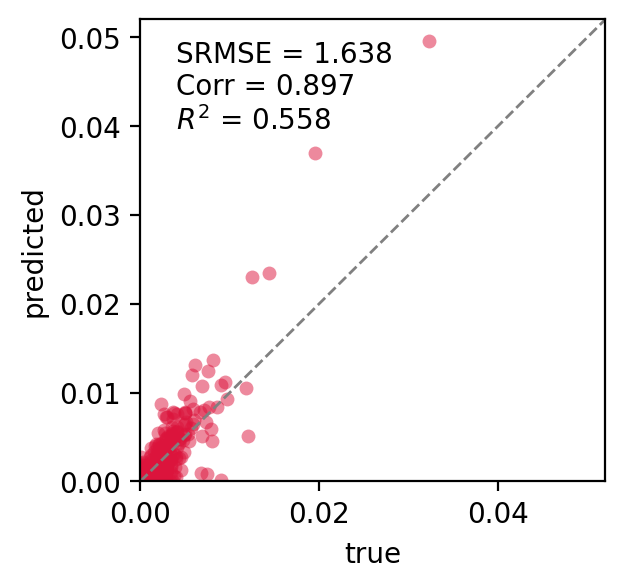

In [150]:
validationGAN.validate_Gan_Cat(df, test, test)

In [44]:
df.HomeAdrZone.nunique()

1328

In [23]:
os.chdir('/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Data')
df_dtypes = {
    'HomeAdrZone': 'category',
}
datgan_pop = pd.read_csv('synthetic_popDenmark_v8_v2.csv', sep= ',', dtype=df_dtypes)
len(datgan_pop)

5999941

In [36]:
datgan_pop.MunicipalityOrigin = datgan_pop.MunicipalityOrigin.astype('category')
datgan_pop.RespAgeCorrect = datgan_pop.RespAgeCorrect.astype('category')
datgan_pop.Gender = datgan_pop.Gender.astype('category')

In [259]:
datgan_pop['HomeAdrZone'].nunique()

6865

In [40]:
mun

,MunicipalityOrigin,total
0,101,0.108598
1,147,0.017913
2,155,0.002489
3,185,0.007383
4,165,0.004763
...,...,...
94,773,0.003477
95,840,0.005172
96,787,0.007457
97,820,0.006307


In [53]:
#IPF
n= 5822763

ag1 = mun*n
ag2 = gender*n
ag3 = age*n
ag4 = popSocio*n

dimensions = [['MunicipalityOrigin'],['Gender'], ['RespAgeCorrect'], ['PopSocio']]
#dimensions = [['Gender']]
aggregates = [ag1, ag2,ag3,ag4]
df_datgan = genPopIPF(datgan_pop, dimensions, aggregates)

In [54]:
df_datgan.to_csv('datgan_pop_marginal.csv')

In [204]:
df_datgan['FamNumPers'].value_counts()

FamNumPers
2     2046812
4     1224375
1     1086603
3      843702
5      474994
6      106984
7       21795
8        6063
9        2698
10       2401
11       2122
12       2083
15       1884
Name: count, dtype: int64

In [265]:
test.drop(['count'], axis=1,inplace=True)

In [266]:
validation(test, df_datgan)

HousehCarOwnership
IncFamily2000
FamNumAdults
FamNumPers
HousehNumAdults
HousehNumPers
IncRespondent2000
WorkHoursPw
HousehNumcars
Year
Gender
RespAgeCorrect
Education
Handicap
PopSocio
RespPrimOcc
KidsBetween0and15
KidsBetween0and4
CarModelYear
MunicipalityOrigin
MunicipalityDest
HomeAdrZone
PrimOccZone
WorkHourType
RespHasBicycle
ResphasDrivlic
RespHasRejsekort
RespIsmemCarshare
Sector
HwDayspW
FuelType
HomeParkPoss
RespHasSeasonticket
HousehAccomodation
HousehAccOwnorRent
PosInFamily
PrimModeDay
ModeChainTypeDay


,mae,rmse,r2,srmse,corr
col,,,,,
HousehCarOwnership,0.003731,0.008287,0.996946,0.116025,0.998764
IncFamily2000,0.000401,0.003533,-14.952665,11.137020,0.030813
FamNumAdults,0.001160,0.002217,0.999848,0.024390,0.999954
FamNumPers,0.001170,0.002011,0.999647,0.028155,0.999832
HousehNumAdults,0.001285,0.002473,0.999800,0.029675,0.999958
HousehNumPers,0.000907,0.001598,0.999750,0.027164,0.999883
IncRespondent2000,0.000588,0.010473,-13.595958,27.177210,0.011354
WorkHoursPw,0.004104,0.023283,0.857179,2.118735,0.929004
HousehNumcars,0.001547,0.003487,0.999365,0.055798,0.999684


In [268]:
df_datgan.HomeAdrZone.nunique()

6865

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Number of combinations: 1584
corr = 0.909635
MAE = 0.000340
RMSE = 0.001062
SRMSE = 1.665668
r2 = 0.600058


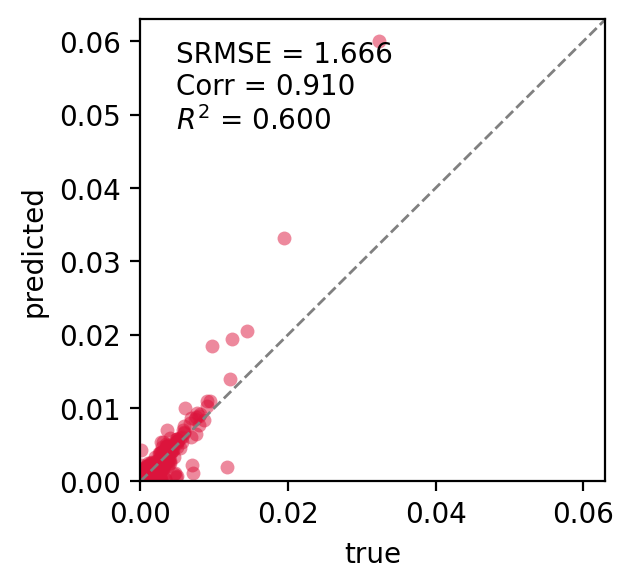

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Gender
Number of combinations: 3168
corr = 0.905728
MAE = 0.000174
RMSE = 0.000538
SRMSE = 1.678173
r2 = 0.594495


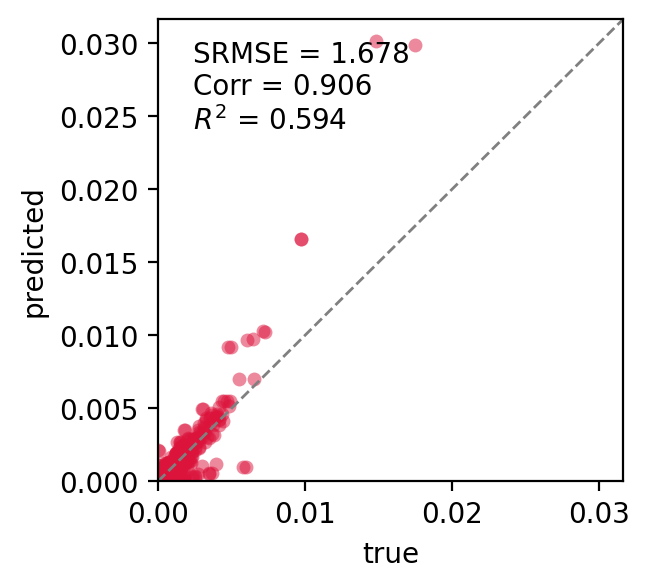

Aggregated variables: 
RespPrimOcc
Gender
Sector
Number of combinations: 1332
corr = 0.643759
MAE = 0.000663
RMSE = 0.004009
SRMSE = 5.227262
r2 = 0.413271


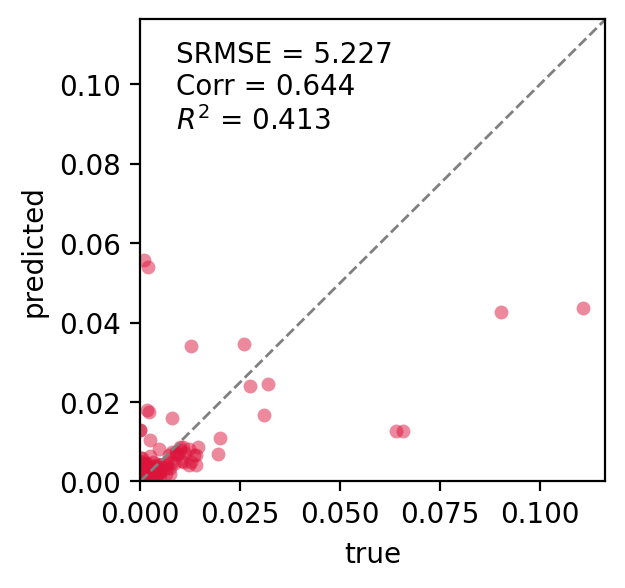

Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
Number of combinations: 9900
corr = 0.560993
MAE = 0.000121
RMSE = 0.000714
SRMSE = 7.005225
r2 = 0.314551


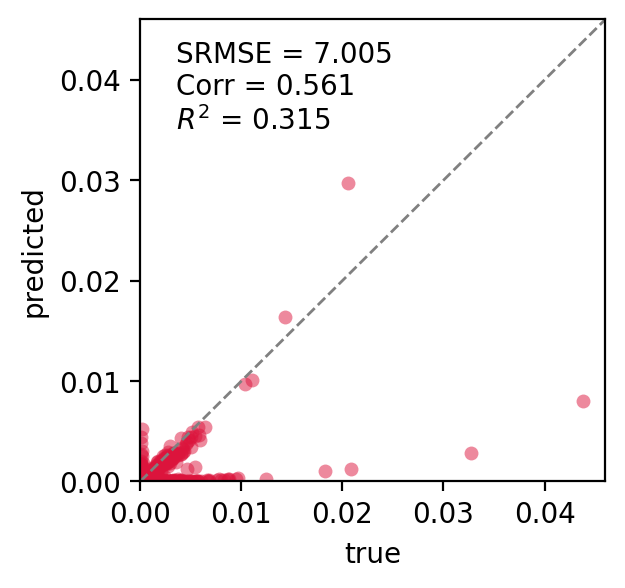

Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
RespPrimOcc
Gender
Number of combinations: 356400
corr = 0.428314
MAE = 0.000009
RMSE = 0.000078
SRMSE = 13.954840
r2 = 0.182616


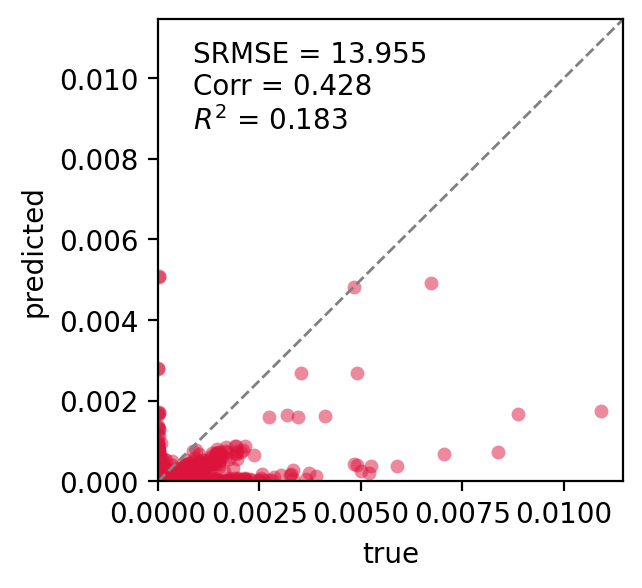

Aggregated variables: 
HomeAdrZone
Number of combinations: 6865
corr = 0.954046
MAE = 0.000048
RMSE = 0.000056
SRMSE = 0.387751
r2 = 0.850101


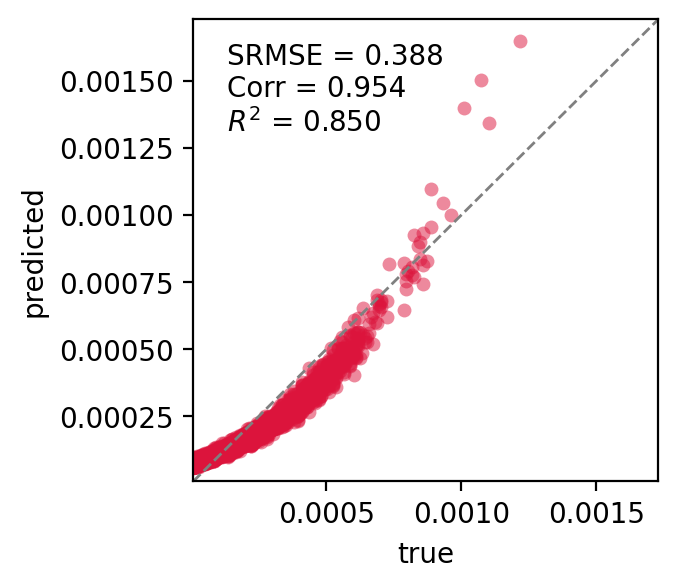

In [267]:
validationGAN.validate_Gan_Cat(df_datgan, test, test)

In [47]:
datgan_pop.HomeAdrZone.astype('category').nunique()

13729

In [257]:
df_datgan.HomeAdrZone.nunique()

13729

In [55]:
test.MunicipalityOrigin.unique()

array([101, 846, 630, 791, 260, 165, 813, 320, 657, 851, 147, 621, 250,
       430, 151, 153, 219, 480, 707, 217, 849, 157, 751, 561, 740, 820,
       615, 329, 370, 265, 173, 350, 550, 340, 756, 766, 746, 661, 187,
       253, 201, 573, 175, 510, 760, 860, 360, 159, 259, 787, 190, 440,
       269, 540, 580, 161, 706, 167, 779, 461, 810, 390, 420, 210, 155,
       730, 400, 163, 316, 330, 671, 169, 479, 376, 450, 710, 230, 326,
       410, 530, 306, 607, 482, 336, 240, 223, 727, 665, 840, 270, 563,
       575, 492, 773, 185, 183, 741, 825, 411])

In [143]:
ds = pd.read_csv('HFUDD16-2.csv', sep=';')
ds =ds.loc[ds.BOPOMR.isin(test.MunicipalityOrigin.unique())]

In [65]:
ds = pd.read_csv('HFUDD16-2.csv', sep=';')
#ds =ds.loc[ds.BOPOMR.isin(test.MunicipalityOrigin.unique())]
ds.KOEN = ds.KOEN.astype('category')
pop_rename = {
    'BOPOMR':'MunicipalityOrigin',
    'UDDANNELSEF':'Education',
    'ERHVERV':'Sector',
    'KOEN':'Gender',
    'ALDER':'AgeGroup',
    'SOCIO':'PopSocio',
    'INDHOLD':'Val',

}

ds.rename(index=str, columns=pop_rename, inplace=True)
ds.Gender = ds.Gender.astype('category').cat.rename_categories({'M':1, 'K':2})
ds.Val.sum()

12101010

In [66]:
pop = pd.DataFrame(ds.groupby(['Gender', 'PopSocio']).Val.sum()).reset_index()

In [67]:
pop['total'] = pop.Val/pop.Val.sum()

In [69]:
pop[['Gender', 'PopSocio', 'total']].to_csv('genpop.csv')

In [173]:
ds.Sector = ds.Sector.astype('category').cat.rename_categories({ 'A': 'Agriculture, forestry and fishing',
'B' : 'Mining and quarrying',
'CA' :'Manufacture of food products, beverages and tobacco',
'CB': 'Textiles and leather products',
'CC' : 'Wood and paper products and printing',
'CD' : 'Oil refinery etc',
'CE' : 'Manufacture of chemicals',
'CF' : 'Pharmaceuticals',
'CG' :'Manufacture of plastic, glass and concrete',
'CH':'Basic metals and fabricated metal products',
'CI' :'Manufacture of electronic components',
'CJ': 'Electrical equipment',
'CK' :'Manufacture of machinery',
'CL' :'Transport equipment',
'CM':'Manufacture of funiture and other manufacturing',
'D' :'Electricity, gas, steam and air conditioning supply',
'E' :'Water supply, sewerage and waste management',
'F' : 'Construction',
'G' :'Wholesale and retail trade',
'H': 'Transportation',
'I' :'Accommodation and food service activities',
'JA': 'Publishing, television and radio broadcasting',
'JB' :'Telecommunications',
'JC' :'IT and information service activities',
'K' :'Financial and insurance',
'L' :'Real estate activities',
'MA': 'Consultancy etc.',
'MB' :'Scientific research and development',
'MC': 'Advertising and other business services',
'N' :'Travel agent, cleaning, and other operationel services',
'O' :'Public administration, defence and compulsory social security',
'P' :'Education',
'QA':'Human health activities',
'QB' :'Residential care',
'R' :'Arts, entertainment and recreation activities',
'S': 'Other service activities etc.',
'X' :'Activity not stated' })

In [174]:
gender

Gender
1    0.497516
2    0.502484
Name: total, dtype: float64

In [157]:
ds.Gender.value_counts(normalize=True)

Gender
1    0.534674
2    0.465326
Name: proportion, dtype: float64

In [164]:
ds.AgeGroup.value_counts(normalize=True)

AgeGroup
45-49    0.108015
30-34    0.107301
25-29    0.107226
40-44    0.106464
50-54    0.104902
35-39    0.104521
55-59    0.099579
60-64    0.087641
20-24    0.081448
65-69    0.057607
15-19    0.035298
Name: proportion, dtype: float64

In [167]:
df_wgan_pop = df.copy()
df_wgan_pop = df.copy()

age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
            '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

# Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
df_wgan_pop.AgeGroup.value_counts(normalize=True)

AgeGroup
50-54             0.103819
25-29             0.101607
45-49             0.098793
55-59             0.097904
20-24             0.096254
40-44             0.091811
30-34             0.090409
60-64             0.086748
35-39             0.082853
65-69             0.080362
15-19             0.069439
under 15 years    0.000000
over 69 years     0.000000
Name: proportion, dtype: float64

In [159]:
df_wgan_pop = df.copy()
df_wgan_pop.Gender.value_counts(normalize=True)


Gender
2    0.502316
1    0.497684
Name: proportion, dtype: float64

corr = 0.596177
MAE = 0.000006
RMSE = 0.000039
SRMSE = 6.350557
r2 = 0.151079


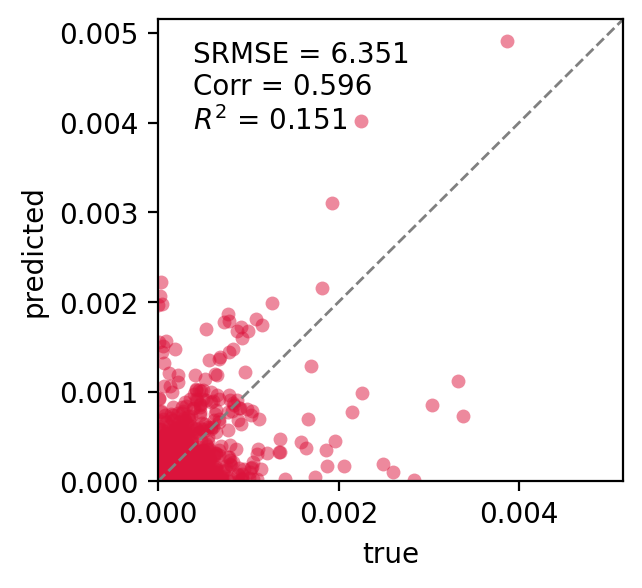

In [189]:
df_wgan_pop = df.copy()

age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
            '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

# Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
df_wgan_pop = df_wgan_pop[['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']]

ds_marg = ds.groupby(['MunicipalityOrigin','AgeGroup','PopSocio','Sector']).Val.sum().reset_index()
df_wgan_pop = df_wgan_pop.groupby(['MunicipalityOrigin','AgeGroup','PopSocio','Sector']).size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
#ds_marg['PopSocio']=ds_marg['PopSocio'].astype('category')
#ds_marg['Gender']=ds_marg['Gender'].astype('category')
#ds_marg['Education'] = ds_marg['Education'].astype('category')

##### Merge and difference
real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=['MunicipalityOrigin','AgeGroup','PopSocio','Sector'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
diff = np.array(real_and_sampled['diff'])

stats = plotUtils.compute_stat(real_and_sampled['Val_real'], real_and_sampled['Val_sampled'],do_plot=True, plot_log=False)#, plot_name='_'.join(['VAE']+agg_vars))

In [175]:
df_wgan_pop = df.copy()

age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
            '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

# Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
df_wgan_pop = df_wgan_pop[['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']]

ds['Gender']=ds['Gender'].astype('category')
df_wgan_pop['Gender']=df_wgan_pop['Gender'].astype('category')

ds_marg = ds.groupby(['Gender']).Val.sum().reset_index()
df_wgan_pop = df_wgan_pop.groupby(['Gender']).size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
#ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
#ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
#ds_marg['PopSocio']=ds_marg['PopSocio'].astype('category')
#ds_marg['Gender']=ds_marg['Gender'].astype('category')
#ds_marg['Education'] = ds_marg['Education'].astype('category')

##### Merge and difference
real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=['Gender'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
diff = np.array(real_and_sampled['diff'])

stats = plotUtils.compute_stat(real_and_sampled['Val_real'], real_and_sampled['Val_sampled'],do_plot=True, plot_log=False)#, plot_name='_'.join(['VAE']+agg_vars))

corr = 1.000000
MAE = 0.010943
RMSE = 0.010943
SRMSE = 0.021887
r2 = -8.442820


In [176]:
real_and_sampled

,Val_real,Val_sampled,diff
0,0.496439,0.485495,0.010943
1,0.503561,0.514505,-0.010943


corr = 0.872206
MAE = 0.002939
RMSE = 0.005035
SRMSE = 0.055385
r2 = 0.515448


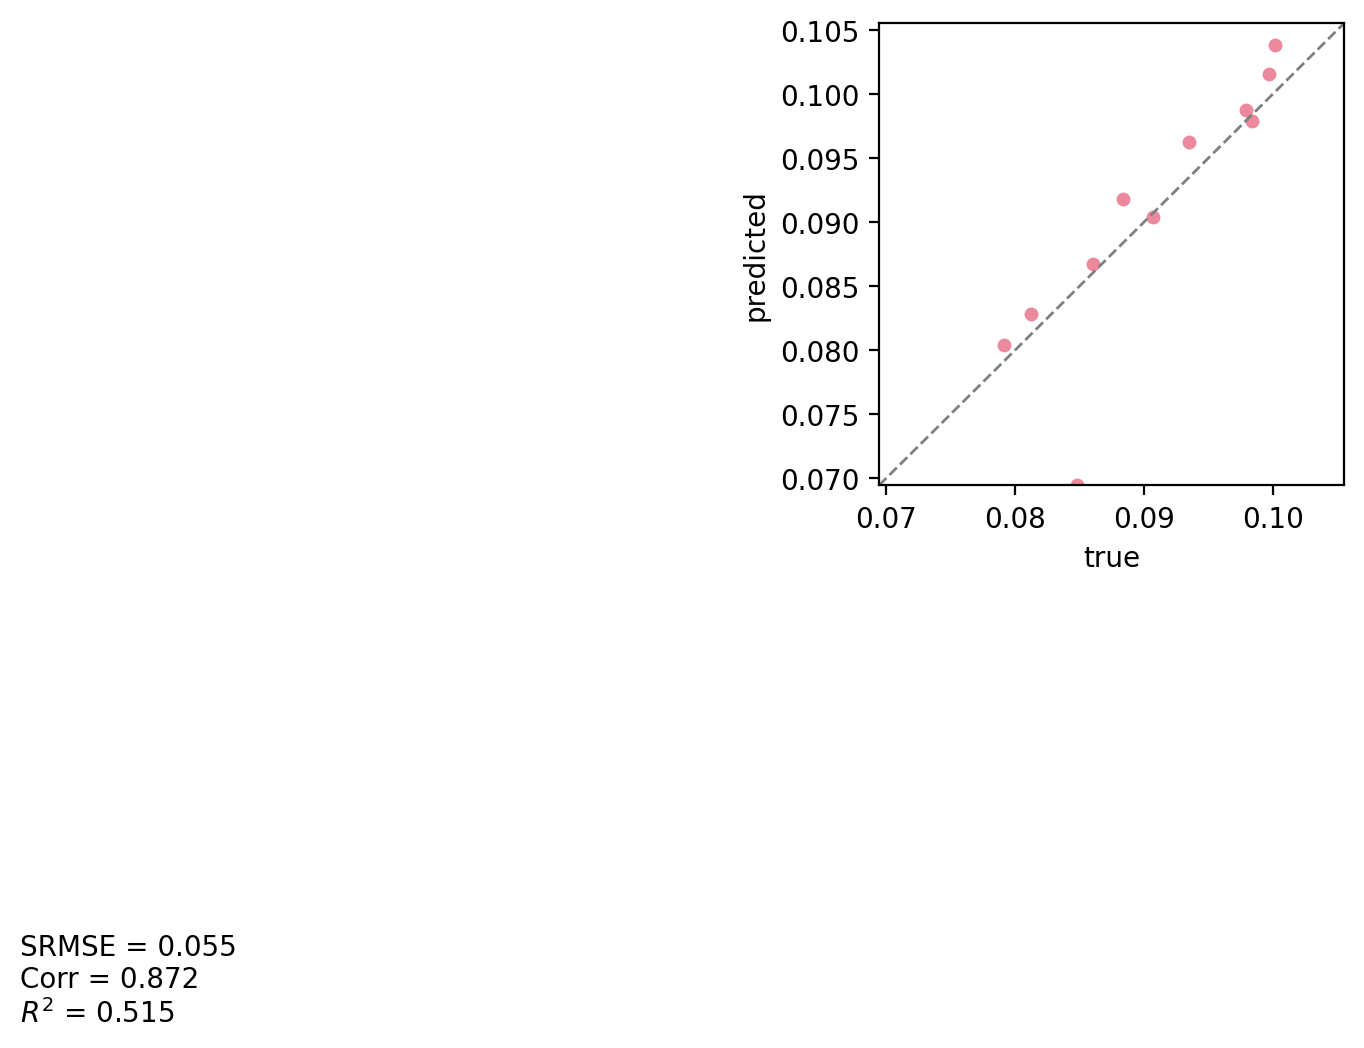

In [177]:
df_wgan_pop = df.copy()

age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
            '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

# Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
df_wgan_pop = df_wgan_pop[['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']]

ds_marg = ds.groupby(['AgeGroup']).Val.sum().reset_index()
df_wgan_pop = df_wgan_pop.groupby(['AgeGroup']).size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
#ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
#ds_marg['PopSocio']=ds_marg['PopSocio'].astype('category')
#ds_marg['Gender']=ds_marg['Gender'].astype('category')
#ds_marg['Education'] = ds_marg['Education'].astype('category')

##### Merge and difference
real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=['AgeGroup'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
diff = np.array(real_and_sampled['diff'])

stats = plotUtils.compute_stat(real_and_sampled['Val_real'], real_and_sampled['Val_sampled'],do_plot=True, plot_log=False)#, plot_name='_'.join(['VAE']+agg_vars))

In [178]:
real_and_sampled

,Val_real,Val_sampled,diff
0,0.084836,0.069439,0.015396
1,0.093533,0.096254,-0.002720
2,0.099710,0.101607,-0.001897
3,0.090703,0.090409,0.000294
4,0.081206,0.082853,-0.001647
5,0.088361,0.091811,-0.003450
6,0.097894,0.098793,-0.000899
7,0.100206,0.103819,-0.003613
8,0.098376,0.097904,0.000472
9,0.086062,0.086748,-0.000686


corr = 0.990282
MAE = 0.001404
RMSE = 0.002169
SRMSE = 0.214772
r2 = 0.976132


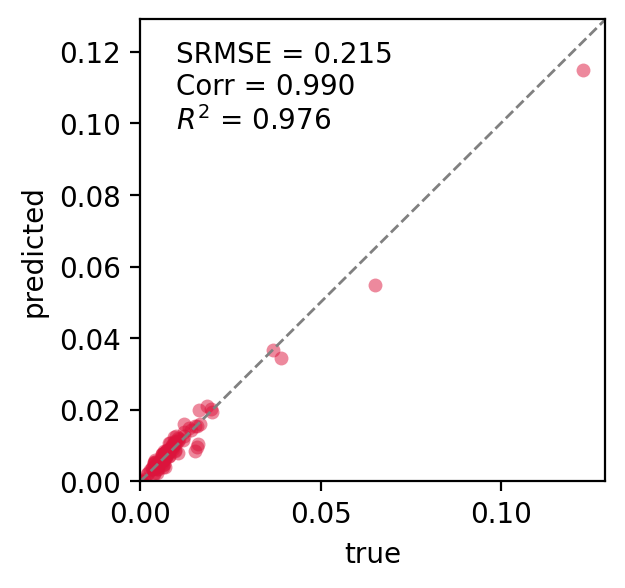

In [179]:
df_wgan_pop = df.copy()

age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
            '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

# Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
df_wgan_pop = df_wgan_pop[['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']]

ds_marg = ds.groupby(['MunicipalityOrigin']).Val.sum().reset_index()
df_wgan_pop = df_wgan_pop.groupby(['MunicipalityOrigin']).size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
#ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
#ds_marg['PopSocio']=ds_marg['PopSocio'].astype('category')
#ds_marg['Gender']=ds_marg['Gender'].astype('category')
#ds_marg['Education'] = ds_marg['Education'].astype('category')

##### Merge and difference
real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=['MunicipalityOrigin'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
diff = np.array(real_and_sampled['diff'])

stats = plotUtils.compute_stat(real_and_sampled['Val_real'], real_and_sampled['Val_sampled'],do_plot=True, plot_log=False)#, plot_name='_'.join(['VAE']+agg_vars))

corr = 0.564002
MAE = 0.065513
RMSE = 0.103428
SRMSE = 1.137705
r2 = -0.156199


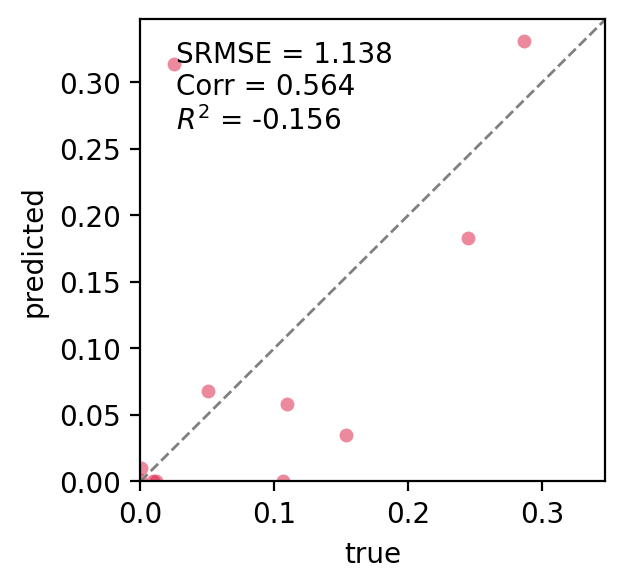

In [180]:
df_wgan_pop = df.copy()

age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
            '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

# Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
df_wgan_pop = df_wgan_pop[['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']]

ds_marg = ds.groupby(['Education']).Val.sum().reset_index()
df_wgan_pop = df_wgan_pop.groupby(['Education']).size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
#ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
#ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
#ds_marg['PopSocio']=ds_marg['PopSocio'].astype('category')
#ds_marg['Gender']=ds_marg['Gender'].astype('category')
ds_marg['Education'] = ds_marg['Education'].astype('category')

##### Merge and difference
real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=['Education'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
diff = np.array(real_and_sampled['diff'])

stats = plotUtils.compute_stat(real_and_sampled['Val_real'], real_and_sampled['Val_sampled'],do_plot=True, plot_log=False)#, plot_name='_'.join(['VAE']+agg_vars))

corr = 0.958641
MAE = 0.007060
RMSE = 0.014925
SRMSE = 0.552234
r2 = 0.918945


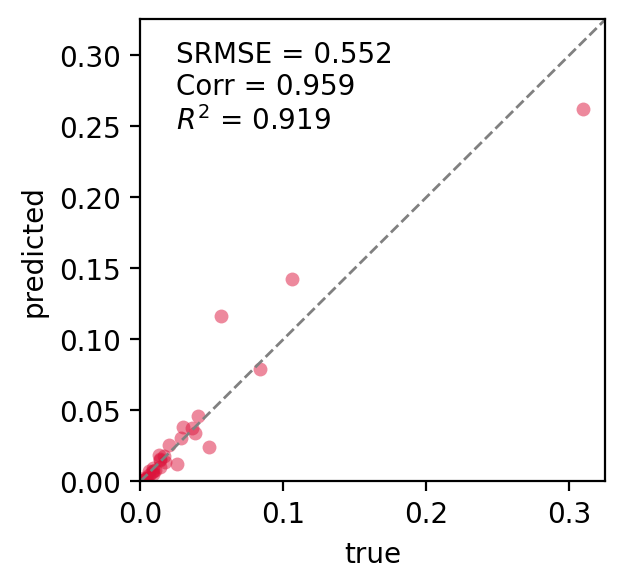

In [183]:
df_wgan_pop = df.copy()

age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
            '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

# Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
df_wgan_pop = df_wgan_pop[['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']]

ds_marg = ds.groupby(['Sector']).Val.sum().reset_index()
df_wgan_pop = df_wgan_pop.groupby(['Sector']).size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
#ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
#ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
#ds_marg['PopSocio']=ds_marg['PopSocio'].astype('category')
#ds_marg['Gender']=ds_marg['Gender'].astype('category')
#ds_marg['Education'] = ds_marg['Education'].astype('category')

##### Merge and difference
real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=['Sector'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
diff = np.array(real_and_sampled['diff'])

stats = plotUtils.compute_stat(real_and_sampled['Val_real'], real_and_sampled['Val_sampled'],do_plot=True, plot_log=False)#, plot_name='_'.join(['VAE']+agg_vars))

corr = 0.977608
MAE = 0.083828
RMSE = 0.098753
SRMSE = 0.395013
r2 = 0.794404


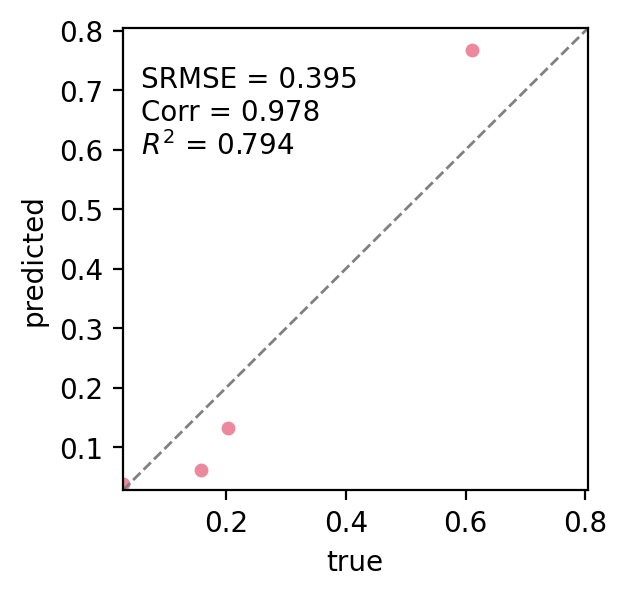

In [184]:
df_wgan_pop = df.copy()

age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
            '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

# Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
df_wgan_pop = df_wgan_pop[['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']]

ds_marg = ds.groupby(['PopSocio']).Val.sum().reset_index()
df_wgan_pop = df_wgan_pop.groupby(['PopSocio']).size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
#ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
#ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
#ds_marg['PopSocio']=ds_marg['PopSocio'].astype('category')
#ds_marg['Gender']=ds_marg['Gender'].astype('category')
#ds_marg['Education'] = ds_marg['Education'].astype('category')

##### Merge and difference
real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=['PopSocio'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
diff = np.array(real_and_sampled['diff'])

stats = plotUtils.compute_stat(real_and_sampled['Val_real'], real_and_sampled['Val_sampled'],do_plot=True, plot_log=False)#, plot_name='_'.join(['VAE']+agg_vars))

corr = 0.636283
MAE = 0.000006
RMSE = 0.000033
SRMSE = 5.402759
r2 = 0.402067


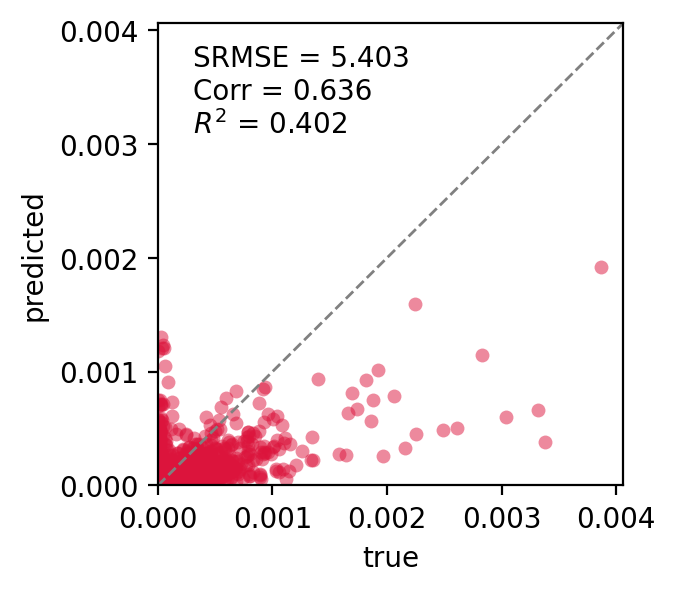

In [190]:
df_wgan_pop = datgan_pop.copy()

age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
            '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

# Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
df_wgan_pop = df_wgan_pop[['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']]

ds_marg = ds.groupby(['MunicipalityOrigin','AgeGroup','PopSocio','Sector']).Val.sum().reset_index()
df_wgan_pop = df_wgan_pop.groupby(['MunicipalityOrigin','AgeGroup','PopSocio','Sector']).size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
#ds_marg['PopSocio']=ds_marg['PopSocio'].astype('category')
#ds_marg['Gender']=ds_marg['Gender'].astype('category')
#ds_marg['Education'] = ds_marg['Education'].astype('category')

##### Merge and difference
real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=['MunicipalityOrigin','AgeGroup','PopSocio','Sector'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
diff = np.array(real_and_sampled['diff'])

stats = plotUtils.compute_stat(real_and_sampled['Val_real'], real_and_sampled['Val_sampled'],do_plot=True, plot_log=False)#, plot_name='_'.join(['VAE']+agg_vars))

corr = 0.361879
MAE = 0.000000
RMSE = 0.000004
SRMSE = 13.931932
r2 = 0.122744


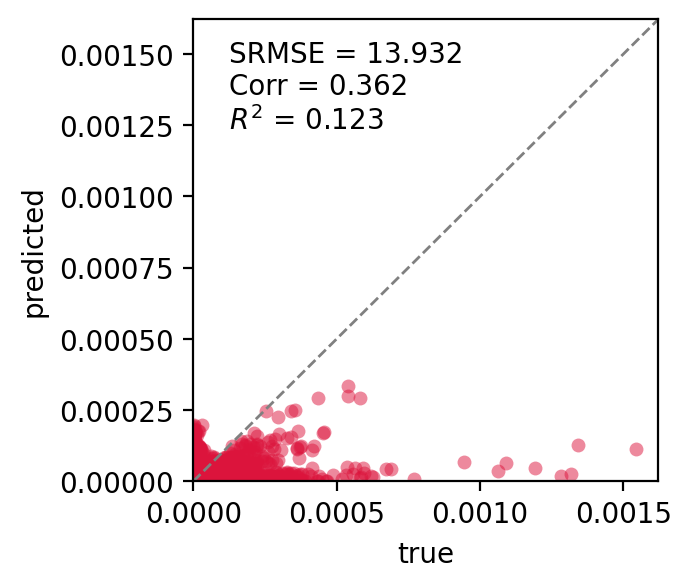

In [191]:
df_wgan_pop = datgan_pop.copy()

age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
            '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

# Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
df_wgan_pop = df_wgan_pop[['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']]

ds_marg = ds.groupby(['MunicipalityOrigin','Gender','Education','AgeGroup','PopSocio','Sector']).Val.sum().reset_index()
df_wgan_pop = df_wgan_pop.groupby(['MunicipalityOrigin','Gender','Education','AgeGroup','PopSocio','Sector']).size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
#ds_marg['PopSocio']=ds_marg['PopSocio'].astype('category')
#ds_marg['Gender']=ds_marg['Gender'].astype('category')
#ds_marg['Education'] = ds_marg['Education'].astype('category')

##### Merge and difference
real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=['MunicipalityOrigin','Gender','Education','AgeGroup','PopSocio','Sector'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
diff = np.array(real_and_sampled['diff'])

stats = plotUtils.compute_stat(real_and_sampled['Val_real'], real_and_sampled['Val_sampled'],do_plot=True, plot_log=False)#, plot_name='_'.join(['VAE']+agg_vars))

In [194]:
columns = ['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']
for col in columns:    
    df_wgan_pop = df.copy()

    age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
    age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
                '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

    # Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
    df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
    df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
    df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
    df_wgan_pop = df_wgan_pop[['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']]

    ds_marg = ds.groupby(col).Val.sum().reset_index()
    df_wgan_pop = df_wgan_pop.groupby(col).size().reset_index()
    df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
    df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
    ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
    ds_marg[col]= ds_marg[col].astype('category')
    #ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
    #ds_marg['PopSocio']=ds_marg['PopSocio'].astype('category')
    #ds_marg['Gender']=ds_marg['Gender'].astype('category')
    #ds_marg['Education'] = ds_marg['Education'].astype('category')

    ##### Merge and difference
    real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=col, how='outer', indicator=True)
    real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
    real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
    diff = np.array(real_and_sampled['diff'])
    print(col)
    stats = plotUtils.compute_stat(real_and_sampled['Val_real'], real_and_sampled['Val_sampled'],do_plot=False, plot_log=False)#, plot_name='_'.join(['VAE']+agg_vars))
    print(stats)

MunicipalityOrigin
{'mae': 0.001404481150659724, 'rmse': 0.002169416214994204, 'r2': 0.9761319947054715, 'srmse': 0.21477220528442617, 'corr': 0.9902815653083011}
AgeGroup
{'mae': 0.002938572890021794, 'rmse': 0.0050350362078378464, 'r2': 0.515448448663254, 'srmse': 0.05538539828621631, 'corr': 0.8722064834638985}
PopSocio
{'mae': 0.08382807234311225, 'rmse': 0.0987533262268752, 'r2': 0.7944042122239473, 'srmse': 0.39501330490750086, 'corr': 0.9776076060818841}
Education
{'mae': 0.06551310815721301, 'rmse': 0.10342768219465673, 'r2': -0.1561988404956487, 'srmse': 1.137704504141224, 'corr': 0.5640017380942504}
Gender
{'mae': 0.010943497150400439, 'rmse': 0.010943497150400437, 'r2': -8.442820363057377, 'srmse': 0.021886994300800874, 'corr': 1.0}
Sector
{'mae': 0.0070602957482443305, 'rmse': 0.014925243598263726, 'r2': 0.918944711760494, 'srmse': 0.5522340131357578, 'corr': 0.9586406388190237}


In [193]:
columns = ['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']
for col in columns:    
    df_wgan_pop = datgan_pop.copy()

    age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
    age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
                '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

    # Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
    df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
    df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
    df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
    df_wgan_pop = df_wgan_pop[['MunicipalityOrigin','AgeGroup', 'PopSocio', 'Education','Gender', 'Sector']]

    ds_marg = ds.groupby(col).Val.sum().reset_index()
    df_wgan_pop = df_wgan_pop.groupby(col).size().reset_index()
    df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
    df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
    ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
    ds_marg[col]= ds_marg[col].astype('category')
    #ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
    #ds_marg['PopSocio']=ds_marg['PopSocio'].astype('category')
    #ds_marg['Gender']=ds_marg['Gender'].astype('category')
    #ds_marg['Education'] = ds_marg['Education'].astype('category')

    ##### Merge and difference
    real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=col, how='outer', indicator=True)
    real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
    real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
    diff = np.array(real_and_sampled['diff'])
    print(col)
    stats = plotUtils.compute_stat(real_and_sampled['Val_real'], real_and_sampled['Val_sampled'],do_plot=False, plot_log=False)#, plot_name='_'.join(['VAE']+agg_vars))
    print(stats)

MunicipalityOrigin
{'mae': 0.0014559554960546647, 'rmse': 0.003852551791168864, 'r2': 0.9247290610982966, 'srmse': 0.3814026273257175, 'corr': 0.9849006397195564}
AgeGroup
{'mae': 0.013398732889916248, 'rmse': 0.01509781278196825, 'r2': -3.3567522454539356, 'srmse': 0.16607594060165073, 'corr': 0.20689948514315304}
PopSocio
{'mae': 0.03586844991002837, 'rmse': 0.04549227560820075, 'r2': 0.9563699138262504, 'srmse': 0.18196910243280304, 'corr': 0.9887605985050727}
Education
{'mae': 0.05801543500681654, 'rmse': 0.08943594124988799, 'r2': 0.13546394718267318, 'srmse': 0.9837953537487679, 'corr': 0.6344335095183792}
Gender
{'mae': 0.014079595140328277, 'rmse': 0.014079595140328275, 'r2': -14.630389596858192, 'srmse': 0.02815919028065655, 'corr': -1.0}
Sector
{'mae': 0.006221899202686191, 'rmse': 0.018505431651035714, 'r2': 0.8729157447644788, 'srmse': 0.7032064027393572, 'corr': 0.9386017686781991}


In [231]:

bla = pd.read_csv('train.csv')

/var/folders/vh/m95vnnh52nb1v4qfq2439lp80000gn/T/ipykernel_45111/3046832994.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  bla = pd.read_csv('train.csv')


,Unnamed: 0,CarModelYear,Education,FamNumAdults,FamNumPers,FuelType,Gender,Handicap,HomeAdrZone,HousehCarOwnership,...,RespAgeCorrect,RespHasBicycle,RespHasRejsekort,RespIsmemCarshare,RespPrimOcc,ResphasDrivlic,Sector,WorkHourType,WorkHoursPw,Year
0,65076,2003.0,H10,4,6,1.0,1,2.0,846211.0,1.0,...,22,1.0,6.0,2.0,116.0,1.0,Residential care,Not working,0.0,2010
1,6178,2009.0,H10,3,6,1.0,1,2.0,1619.0,1.0,...,12,1.0,10.0,2.0,107.0,-18.0,Education,Not working,0.0,2011
2,31893,2007.0,H60,2,2,2.0,1,2.0,3307.0,2.0,...,75,1.0,1.0,2.0,370.0,1.0,Activity not stated,Not working,0.0,2018
3,21387,1998.0,H60,1,1,1.0,2,2.0,751624.0,1.0,...,82,2.0,30.0,2.0,370.0,1.0,Activity not stated,Not working,0.0,2010
4,59643,2008.0,H30,2,7,2.0,1,2.0,630113.0,2.0,...,41,1.0,35.0,2.0,221.0,1.0,Accommodation and food service activities,MISSING,40.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97890,139478,2018.0,H60,2,2,1.0,2,2.0,270119.0,1.0,...,63,1.0,10.0,2.0,360.0,1.0,Activity not stated,Not working,0.0,2021
97891,139520,-1.0,H30,2,2,NoCar,2,1.0,102852.0,0.0,...,61,2.0,30.0,2.0,350.0,2.0,Activity not stated,Not working,0.0,2021
97892,139530,2011.0,H60,2,2,1.0,1,2.0,159011.0,2.0,...,58,1.0,30.0,2.0,210.0,1.0,Wholesale and retail trade,2.0,37.0,2021
97893,139545,-1.0,H60,2,2,NoCar,1,2.0,219032.0,0.0,...,65,2.0,30.0,2.0,350.0,1.0,Activity not stated,Not working,0.0,2021


In [235]:
bla['MunicipalityOrigin'] = bla['MunicipalityOrigin'].astype('category')

In [236]:
#IPF
n= 5822763

ag1 = mun*n
ag2 = gender*n
ag3 = age*n
ag4 = popSocio*n

dimensions = [['MunicipalityOrigin'],['Gender'], ['RespAgeCorrect'], ['PopSocio']]
#dimensions = [['Gender']]
aggregates = [ag1, ag2,ag3, ag4]


In [238]:
ipf = IPF(bla, dimensions, aggregates)

In [241]:
ipf = round(ipf)

In [219]:
def IPF(df, attr, dist):
    group = list(set([item for sublist in attr for item in sublist]))
    Init = pd.DataFrame(df.groupby(group, as_index=False).size())
    
    Init = Init.rename(columns={'size':'total'})
    Init['total']= Init['total'].replace(0,0.01)
    IPF = ipfn.ipfn(Init, dist, attr)
    sol = IPF.iteration()
    
    return sol

In [245]:
ipf.set_index(['MunicipalityOrigin','Gender', 'RespAgeCorrect', 'PopSocio'], inplace=True)

In [246]:
ipf[ipf.index.repeat(ipf['total'])]

KeyError: "None of [MultiIndex([(101, 1,  5, 0),\n            (101, 1,  5, 0),\n            (101, 1,  5, 0),\n            (101, 1,  5, 0),\n            (101, 1,  5, 0),\n            (101, 1,  5, 0),\n            (101, 1,  5, 0),\n            (101, 1,  5, 0),\n            (101, 1,  5, 0),\n            (101, 1,  5, 0),\n            ...\n            (860, 2, 99, 3),\n            (860, 2, 99, 3),\n            (860, 2, 99, 3),\n            (860, 2, 99, 3),\n            (860, 2, 99, 3),\n            (860, 2, 99, 3),\n            (860, 2, 99, 3),\n            (860, 2, 99, 3),\n            (860, 2, 99, 3),\n            (860, 2, 99, 3)],\n           names=['MunicipalityOrigin', 'Gender', 'RespAgeCorrect', 'PopSocio'], length=5818840)] are in the [columns]"

In [248]:
ipf = ipf.loc[ipf.index.repeat(ipf['total'])]

In [251]:
ipf = ipf.reset_index()

In [252]:
ipf = ipf[['MunicipalityOrigin','Gender', 'RespAgeCorrect', 'PopSocio']]

In [253]:
ipf.to_csv('populationMarg.csv')

In [55]:
pd.read_csv('populationMarg.csv')

,Unnamed: 0,MunicipalityOrigin,Gender,RespAgeCorrect,PopSocio
0,0,101,1,5,0
1,1,101,1,5,0
2,2,101,1,5,0
3,3,101,1,5,0
4,4,101,1,5,0
...,...,...,...,...,...
5818835,5818835,860,2,99,3
5818836,5818836,860,2,99,3
5818837,5818837,860,2,99,3
5818838,5818838,860,2,99,3


In [53]:
def plotjoint(test_df, sampled_df, path):

    plt.rcParams['font.size'] = '16'

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k') 

    categorical = ['MunicipalityOrigin', 'ResphasDrivlic', 'PopSocio']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
    #plt.text(w * 0.08, w * 0.8, text)
    #plt.plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    #plt.plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    #plt.axis([min_Y, max_Y, min_Y, max_Y])

    axs[0,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,0].text(w * 0.08, w * 0.7, text)
    axs[0,0].set_title('MunicipalityOrigin, ResphasDrivlic and PopSocio', fontsize=10)
    axs[0,0].set_xlabel('Test', fontsize=14)
    axs[0,0].set_ylabel('Sampled', fontsize=14)
    axs[0,0].axis([min_Y, max_Y, min_Y, max_Y])
    #axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, fontsize=12)
    #axs[0,2].set_yticklabels(axs[0,2].get_yticklabels(),  fontsize=12) 

    categorical = ['MunicipalityOrigin', 'ResphasDrivlic', 'PopSocio', 'Gender']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05



    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
    axs[0,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,1].text(w * 0.08, w * 0.7, text)
    axs[0,1].set_title('MunicipalityOrigin, ResphasDrivlic, PopSocio and Gender',fontsize=10)
    axs[0,1].set_xlabel('Test', fontsize=14)
    axs[0,1].set_ylabel('Sampled', fontsize=14)
    axs[0,1].axis([min_Y, max_Y, min_Y, max_Y])


    categorical = ['Gender','RespPrimOcc', 'Sector']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05



    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)

    axs[1,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,0].text(w * 0.08, w * 0.7, text)
    axs[1,0].set_title('Gender, RespPrimOcc and Sector', fontsize=10)
    axs[1,0].set_xlabel('Test', fontsize=14)
    axs[1,0].set_ylabel('Sampled', fontsize=14)
    axs[1,0].axis([min_Y, max_Y, min_Y, max_Y])

    categorical = ['Gender', 'RespHasBicycle']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)

    axs[1,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,1].text(w * 0.08, w * 0.7, text)
    axs[1,1].set_title('Gender and RespHasBicycle', fontsize=10)
    axs[1,1].set_xlabel('Test', fontsize=14)
    axs[1,1].set_ylabel('Sampled', fontsize=14)
    axs[1,1].axis([min_Y, max_Y, min_Y, max_Y])



    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

    #fig.savefig(path)